# Week 4

In [101]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

from operator import itemgetter
%matplotlib inline

In [102]:
from operator import itemgetter

def orderDict(x: dict, desc=True):
    return sorted(x.items(), key=itemgetter(1), reverse=desc)

### Degree Distribution

The degree distribution, ```P(k)``` of a network is the number of nodes of degree ```k```, divided by the total number of nodes, i.e.:

```P(k) = (# nodes with k-degree) / len(g.nodes())```

###### # Example 1

/home/f4119597/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


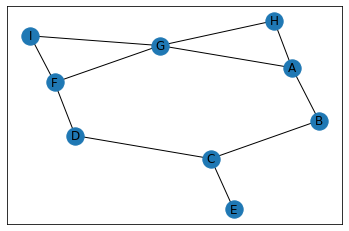

In [103]:
g = nx.Graph()
g.add_edges_from([
    ('A', 'H'), ('H', 'G'), ('I', 'G'), ('I', 'F'), 
    ('A', 'G'), ('G', 'F'), ('A', 'B'), ('F', 'D'), 
    ('B', 'C'), ('D', 'C'), ('C', 'E')
])

pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

In [104]:
{'degrees': dict(g.degree()), 'sum': sum(dict(g.degree()).values())}

{'degrees': {'A': 3,
  'H': 2,
  'G': 4,
  'I': 2,
  'F': 3,
  'B': 2,
  'D': 2,
  'C': 3,
  'E': 1},
 'sum': 22}

In [105]:
nodes_cnt = len(g.nodes())
nodes_cnt

9

In [106]:
dg_values = sorted(set(dict(g.degree()).values()))
dg_values

[1, 2, 3, 4]

In [107]:
higher_degree = orderDict(dict(g.degree()))[0][1]
higher_degree

4

In [108]:
degrees = [degree for node, degree in g.degree()]
degrees

[3, 2, 4, 2, 3, 2, 2, 3, 1]

In [109]:
dg_cnt = {}

# We could start from degree zero, but we know theres no node with such degree
for d in range(1, higher_degree + 1): 
    dg_cnt[str(d)] = degrees.count(d)

dg_cnt

{'1': 1, '2': 4, '3': 3, '4': 1}

In [110]:
dg_dist = {}

for dg, cnt in dg_cnt.items():
    dg_dist[dg] = (cnt/nodes_cnt)

dg_dist

{'1': 0.1111111111111111,
 '2': 0.4444444444444444,
 '3': 0.3333333333333333,
 '4': 0.1111111111111111}

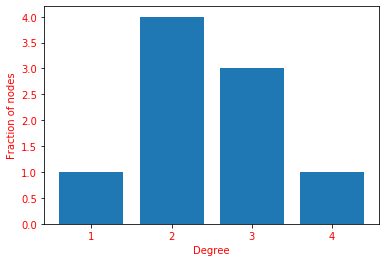

In [111]:
plt.bar(x=dg_cnt.keys(), height=dg_cnt.values())

[i.set_color("red") for i in plt.gca().get_xticklabels()]
[i.set_color("red") for i in plt.gca().get_yticklabels()]

plt.xlabel('Degree').set_color("red")
plt.ylabel('Fraction of nodes').set_color("red")


###### # Example 2

/home/f4119597/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


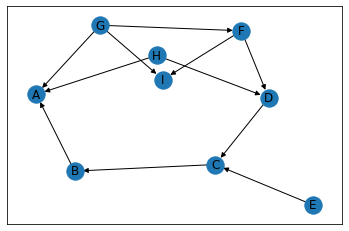

In [112]:
g = nx.DiGraph()
g.add_edges_from([
    ('H', 'A'), ('H', 'D'), ('G', 'I'), ('F', 'I'), 
    ('G', 'A'), ('G', 'F'), ('F', 'D'), ('B', 'A'), 
    ('C', 'B'), ('D', 'C'), ('E', 'C')
])

pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

Note that here, we have nodes with ```in-degree = 0```

In [113]:
num_of_nodes = nx.number_of_nodes(g)
num_of_nodes

9

In [114]:
in_degrees_list = [degree for node, degree in g.in_degree()]
in_degrees_list

[0, 3, 2, 0, 2, 1, 1, 2, 0]

In [115]:
higher_degree = orderDict(dict(g.degree()))[0][1]
higher_degree

3

In [116]:
dg_cnt = {}
for d in range(0, higher_degree + 1): 
    dg_cnt[str(d)] = in_degrees_list.count(d)

dg_cnt

{'0': 3, '1': 2, '2': 3, '3': 1}

In [117]:
dg_dist = {}
for dg, cnt in dg_cnt.items():
    dg_dist[dg] = (cnt/nodes_cnt)

dg_dist

{'0': 0.3333333333333333,
 '1': 0.2222222222222222,
 '2': 0.3333333333333333,
 '3': 0.1111111111111111}

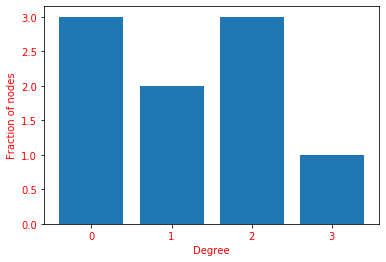

In [118]:
plt.bar(x=dg_cnt.keys(), height=dg_cnt.values())

[i.set_color("red") for i in plt.gca().get_xticklabels()]
[i.set_color("red") for i in plt.gca().get_yticklabels()]

plt.xlabel('Degree').set_color("red")
plt.ylabel('Fraction of nodes').set_color("red")

### Power Law

![power law](./media/powerlaw.png)

Can we come up with a model that generates a network that has a power law like degree distribution?

### Preferential Attachment Model

- Start with 2 nodes at time ```k = 0```;

- At each time ```k + 1```, add a new node with an edge connecting it to an existing node;


- The probability of a new node ```v``` connecting to a node ```u``` of degree ```d(u)``` is:
    ```d(u)/sum(g.degrees())```

###### # Example 3

![pref att model 1](./media/pamodel_01.png)

In [119]:
degree_1 = 1
degree_2 = 1
sum_degree = 2

# Probabilty of node 3 attaching to each node
p_3_to_1 = round(degree_1/sum_degree, 2)
p_3_to_2 = round(degree_2/sum_degree, 2)

{'prob_of_1': p_3_to_1, 'prob_of_2': p_3_to_2}

{'prob_of_1': 0.5, 'prob_of_2': 0.5}

![pref att model 2](./media/pamodel_02.png)

In [120]:
degree_1 = 1
degree_2 = 2
degree_3 = 1
sum_degree = 4

# Probabilty of node 4 attaching to node each node
p_4_to_1 = round(degree_1/sum_degree, 2)
p_4_to_2 = round(degree_2/sum_degree, 2)
p_4_to_3 = round(degree_3/sum_degree, 2)

{'prob_of_1': p_4_to_1, 'prob_of_2': p_4_to_2, 'prob_of_3': p_4_to_3}

{'prob_of_1': 0.25, 'prob_of_2': 0.5, 'prob_of_3': 0.25}

![pref att model 3](./media/pamodel_03.png)

In [121]:
degree_1 = 1
degree_2 = 2
degree_3 = 2
degree_4 = 1
sum_degree = 6

# Probabilty of node 5 attaching to node each node
p_5_to_1 = round(degree_1/sum_degree, 2)
p_5_to_2 = round(degree_2/sum_degree, 2)
p_5_to_3 = round(degree_3/sum_degree, 2)
p_5_to_4 = round(degree_4/sum_degree, 2)

{'prob_of_1': p_5_to_1, 'prob_of_2': p_5_to_2,
 'prob_of_3': p_5_to_3, 'prob_of_4': p_5_to_3}

{'prob_of_1': 0.17, 'prob_of_2': 0.33, 'prob_of_3': 0.33, 'prob_of_4': 0.33}

Few steps later...

![pref att model 4](./media/pamodel_04.png)

As the number of nodes increases, the degree distribution of the network under the Preferential Attachment Model approaches the Power Law 

```f(k) = C * k^(-3)```, with ```constant C```

The Pref. Attachment Model produces networks with degree distributions similar to real networks. "Rich Get Richer phenomenon"

###### # Example 4

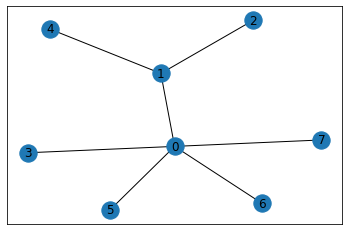

In [122]:
g = nx.barabasi_albert_graph(8, 1)
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

###### # Example 5

In [123]:
g = nx.barabasi_albert_graph(1000000, 1)

In [124]:
degrees = dict(g.degree())

In [125]:
degree_values = sorted(set(degrees.values()))

In [126]:
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(g)) for i in degree_values]

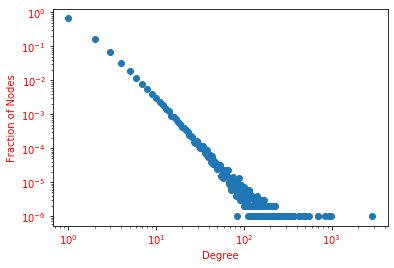

In [127]:
plt.plot(degree_values, histogram, 'o')

[i.set_color("red") for i in plt.gca().get_xticklabels()]
[i.set_color("red") for i in plt.gca().get_yticklabels()]


plt.xlabel('Degree').set_color('red')
plt.ylabel('Fraction of Nodes').set_color('red')
plt.xscale('log')
plt.yscale('log')
plt.show()

### More about the Power Law

![more about power law](./media/article_01.png)

[...] "Just as normal distributions arise frommany independent random decisions averaging out, we will find that power laws arise from the feedback introduced by correlated decisions across a population."

### Milgram Small World Experiment

Set up:
- 296 Randomly chosen 'starters' asked to foward a letter to a 'target' 
- Target was a stockbroker in Boston

Instructions:
- Send letter to target if you know him on a first name basis
- Else, send it to someone else along with the instructions

Results:
- 64/296 Letters reached the target
- Median chain lenght was 6

### Path Lenght and Clustering

Social networks tend to have high ```clustering coeff``` and small average path lenght

###### # Example 6

In [128]:
g = nx.barabasi_albert_graph(1000, 4)

In [129]:
# Note that the values may differ from the course cause 
# the generate network won't probably be the same
nx.average_clustering(g), nx.average_shortest_path_length(g)

(0.03422403824289578, 3.1923503503503503)

###### # Example 7

In [130]:
g2 = nx.barabasi_albert_graph(1000, 2)
g4 = nx.barabasi_albert_graph(1000, 4)
g6 = nx.barabasi_albert_graph(1000, 6)
g8 = nx.barabasi_albert_graph(1000, 8)
g10 = nx.barabasi_albert_graph(1000, 10)

In [131]:
graphList = [g2, g4, g6, g8, g10]
edges = [2, 4, 6, 8, 10]

In [132]:
data = [(nx.average_clustering(g), nx.average_shortest_path_length(g)) for g in graphList]

In [133]:
avg_clst = [m[0] for m in data]
avg_sh_path = [m[1] for m in data]

<Figure size 432x288 with 0 Axes>

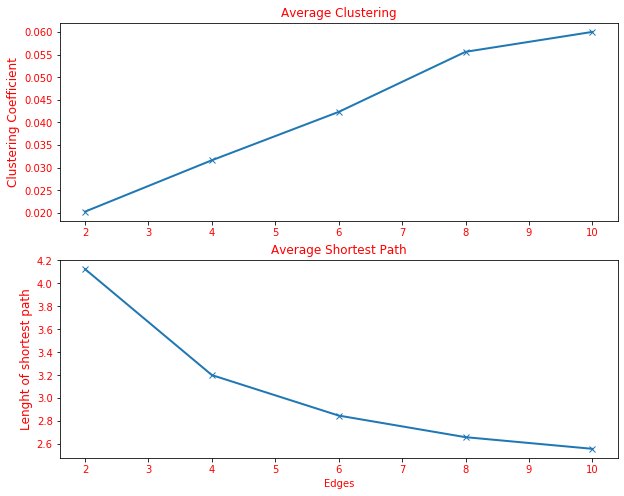

In [134]:
plt.figure()

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(edges, avg_clst, 'x-', linewidth=2)
plt.title('Average Clustering').set_color('red')
# plt.xlabel('Edges').set_color('red')
plt.ylabel('Clustering Coefficient', size=12).set_color('red')

[i.set_color("red") for i in plt.gca().get_xticklabels()]
[i.set_color("red") for i in plt.gca().get_yticklabels()]

plt.subplot(2, 1, 2)
plt.plot(edges, avg_sh_path, 'x-', linewidth=2)
plt.title('Average Shortest Path').set_color('red')
plt.xlabel('Edges').set_color('red')
plt.ylabel('Lenght of shortest path', size=12).set_color('red')

[i.set_color("red") for i in plt.gca().get_xticklabels()]
[i.set_color("red") for i in plt.gca().get_yticklabels()]

plt.show()

![average measures](./media/avg.png)

### Small World Model

Real networks exhibit high clustering coefficient and small average shortest pahts

Small-world model:
- Start with a ring of ```n``` nodes, where each node is connected to its ```k``` nearest neighbors
- Fix a parameter ```p``` in ```[0,1]```
- Consider each edge ```(u, v)```. With probability ```p```, select a node ```w``` at random and rewire the edge ```(u, v)``` to ```(u, w)```

![small world model measures](./media/swmodel.png)

###### # Example 8

In [135]:
g = nx.watts_strogatz_graph(n=1000, k=6, p=0.04)

In [136]:
nx.average_shortest_path_length(g), nx.average_clustering(g)

(8.22266866866867, 0.5302523809523868)

In [137]:
nx.is_connected(g)

True

Theres a chance that the generated network can me disconnected, and to ensure that it has only one connected component, we may use another method

###### # Example 9

In [138]:
# Runs the algorithm up to 't' times, until it returns a conected small world network
g = nx.connected_watts_strogatz_graph(n=1000, k=6, p=0.04, tries=2)

In [139]:
nx.is_connected(g)

True

In [140]:
nx.average_shortest_path_length(g), nx.average_clustering(g)

(8.836440440440441, 0.53690952380953)

###### # Example 10

In [141]:
# Runs a similar model to the small world network, but rather then rewiring, new edges
# are added with probability 'p'
g = nx.newman_watts_strogatz_graph(n=1000, k=6, p=0.04)

In [142]:
nx.is_connected(g)

True

In [143]:
nx.average_shortest_path_length(g), nx.average_clustering(g)

(8.006288288288289, 0.5588357142857237)

### Common neighbors
We define it as ```common(X,Y) = |N(X) inter N(Y)|```,
where N(X) is the set of neighbors of node X

###### # Example 11

In [144]:
g = nx.Graph()
g.add_edges_from(
    [
        ('A', 'B'), ('B', 'C'), ('B', 'D'), ('A', 'D'), 
        ('D', 'C'), ('A', 'E'), ('C', 'F'), ('E', 'F'), 
        ('E', 'G'), ('F', 'G'), ('G', 'H'), ('G', 'I')
    ]
)

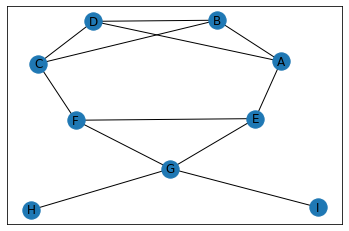

In [145]:
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

In [146]:
list(nx.common_neighbors(g, 'H', 'I'))

['G']

In [147]:
list(nx.common_neighbors(g, 'C', 'A'))

['B', 'D']

In [148]:
(
    list(nx.common_neighbors(g, 'G', 'A')),
    list(nx.common_neighbors(g, 'I', 'A'))
)

(['E'], [])

In [149]:
# all common neighbors
comm_neig = [(e[0], e[1], len(list(nx.common_neighbors(g, e[0], e[1])))) for e in nx.non_edges(g)]

comm_neig[:5]

[('F', 'B', 1), ('F', 'D', 1), ('F', 'H', 1), ('F', 'A', 1), ('F', 'I', 1)]

In [150]:
sorted(comm_neig, key=itemgetter(2), reverse=True)[:5]

[('A', 'C', 2), ('F', 'B', 1), ('F', 'D', 1), ('F', 'H', 1), ('F', 'A', 1)]

### Jaccard Coefficient

Number of neighbors normalized by the total number of neighbors

In [151]:
sorted(list(nx.jaccard_coefficient(g)), key=itemgetter(2), reverse=True)[:5]

[('H', 'I', 1.0),
 ('A', 'C', 0.5),
 ('F', 'H', 0.3333333333333333),
 ('F', 'I', 0.3333333333333333),
 ('E', 'I', 0.3333333333333333)]

### Resource Allocation Index

Fraction of a 'resource' that a node can send to another through their common neighbors

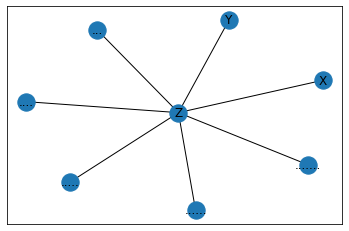

In [152]:
_g = nx.Graph()
_g.add_edges_from([('X', 'Z'), ('Z', 'Y'), 
                   ('Z', '...'), ('Z', '....'),
                   ('Z', '.....'), ('Z', '......'),
                   ('Z', '.......'), ])

nx.draw_networkx(_g, nx.kamada_kawai_layout(_g))

```X``` wants to sends 1 unit of information to ```Y```;

```X``` gives ```1/degree(X)``` to each of its neighbors;

```Z``` receives ```1/degree(X)``` of that information;

```Z``` fowards ```(1/degree(X))/degree(Z)``` to ```Y```

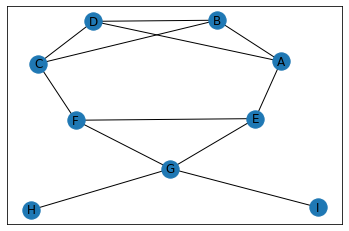

In [153]:
nx.draw_networkx(g, pos)

In [154]:
# list(nx.resource_allocation_index(g))
# ('H', 'I', 0.25)

### Adamic-Adar Index

Similar to Resource Allocation Index, but with log in the denominator

In [155]:
# list(nx.adamic_adar_index(g))
#  ('H', 'I', 0.7213475204444817)

### Preferential Attachment Model

Nodes with high degree get more neighbors

The preferential attachment score of nodes ```x```,```y``` is:

```pref_attach(x, y) = |N(X)| * |N(Y)|```, where N(u) is the number of neighbors

In [156]:
# top 5
sorted(list(nx.preferential_attachment(g)), key=itemgetter(2), reverse=True)[:5]

[('B', 'G', 12), ('D', 'G', 12), ('A', 'G', 12), ('G', 'C', 12), ('F', 'B', 9)]

### Community Structure

Some measures consider the community structures of the network for link prediction

Assume the nodes in this network belong to two different communities (sets of nodes)

![community sctructure](./media/comstructure.png)

Pairs of nodes who belong in the same community and have many common neighbors in their community are likely to form and edge (close a triad)

Number of neighbors in the same community (Soundarajan-Hopcroft Score):

```cn_soundarajan_hopcroft(X, Y) = |N(X) inter N(Y)| + sum(f(u))```,

being ```u``` all nodes who are neighbors of X ```or``` Y,

and ```f(u)``` is such as
- ```1```, if ```u``` is a common neighbor of both X ```and``` Y
- ```0```, else


###### # Example 12

In [157]:
g_ = g.copy()

In [158]:
# Set an attribute called 'community' to the nodes

g.node['A']['community'] = 0
g.node['B']['community'] = 0
g.node['C']['community'] = 0
g.node['D']['community'] = 0
g.node['E']['community'] = 1
g.node['F']['community'] = 1
g.node['G']['community'] = 1
g.node['H']['community'] = 1
g.node['I']['community'] = 1

In [168]:
g.nodes(data=True)

NodeDataView({'A': {'community': 0}, 'B': {'community': 0}, 'C': {'community': 0}, 'D': {'community': 0}, 'E': {'community': 1}, 'F': {'community': 1}, 'G': {'community': 1}, 'H': {'community': 1}, 'I': {'community': 1}})

In [167]:
# top 5
sorted(list(nx.cn_soundarajan_hopcroft(g)), key=itemgetter(2), reverse=True)[:5]

[('A', 'C', 4), ('F', 'H', 2), ('F', 'I', 2), ('E', 'I', 2), ('E', 'H', 2)]

### Community Resource Allocation

Similar to resource allocation, but only considering nodes in the same community

The Resource Allocation Soundarajan-Hopcroft score of nodes X,Y is:

```ra_soundarajan_hopcroft(X,Y) = sum( f(u)/|N(u)| )```, ```f(u)``` as above

###### # Example 13

In [165]:
# top 5
sorted(list(nx.ra_index_soundarajan_hopcroft(g)), key=itemgetter(2), reverse=True)

[('A', 'C', 0.6666666666666666),
 ('F', 'H', 0.25),
 ('F', 'I', 0.25),
 ('E', 'I', 0.25),
 ('E', 'H', 0.25),
 ('H', 'I', 0.25),
 ('F', 'B', 0),
 ('F', 'D', 0),
 ('F', 'A', 0),
 ('B', 'I', 0),
 ('B', 'E', 0),
 ('B', 'G', 0),
 ('B', 'H', 0),
 ('E', 'D', 0),
 ('E', 'C', 0),
 ('D', 'I', 0),
 ('D', 'G', 0),
 ('D', 'H', 0),
 ('H', 'C', 0),
 ('H', 'A', 0),
 ('A', 'I', 0),
 ('A', 'G', 0),
 ('I', 'C', 0),
 ('G', 'C', 0)]

EOF